# Problema

Implementación de la regresión lineal

## Instrucciones

Generar una implementación correcta de la regresión lineal usando el descenso del gradiente como método de optimización de los pesos y compararlo con la implementación directa de la librería sklearn (los valores de w y b no serán exactamente iguales pero muy similares)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [2]:
# Generación del dataset
np.random.seed(0)  # Para reproducibilidad
X = np.random.uniform(1, 10, 5000)  # Generar 5000 valores aleatorios para las horas de estudio
error = np.random.normal(0, 5, 5000)  # Generar errores aleatorios
y = 50 + 5 * X + error  # Generar la puntuación del examen

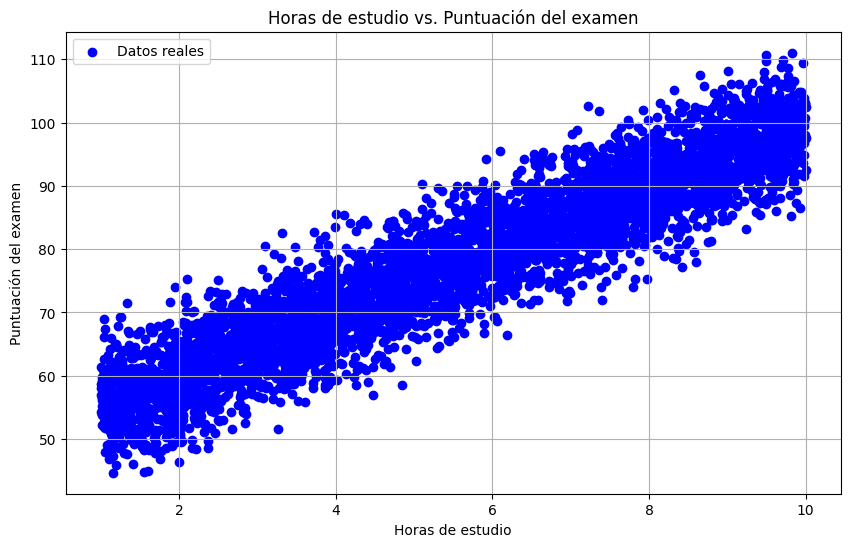

In [3]:
# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

print('Datos de Entrenamiento:', X_train.shape[0])
print('Datos de Validación:', X_val.shape[0])
print('Datos de Test:', X_test.shape[0])

Datos de Entrenamiento: 3000
Datos de Validación: 1000
Datos de Test: 1000


## Implementación manual de la regresión con gradiente descendente

In [6]:
# Función de costo (Mean Squared Error)
def cost_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradiente descendente para ajustar los parámetros del modelo
def train_regression(X_train, y_train, X_val, y_val, lr, epochs):
    n = len(y_train)
    w = np.random.randn()
    b = np.random.randn()
    train_loss_per_epoch = []
    val_loss_per_epoch = []
    
    for epoch in range(epochs):
        y_pred_train = w * X_train.flatten() + b
        train_loss = cost_function(y_train, y_pred_train)
        train_loss_per_epoch.append(train_loss)
        
        gradient_w = (-2 / n) * np.sum((y_train - y_pred_train) * X_train.flatten())
        gradient_b = (-2 / n) * np.sum(y_train - y_pred_train)
        
        w -= lr * gradient_w
        b -= lr * gradient_b
        
        y_pred_val = w * X_val.flatten() + b
        val_loss = cost_function(y_val, y_pred_val)
        val_loss_per_epoch.append(val_loss)
    
    return w, b, train_loss_per_epoch, val_loss_per_epoch

In [10]:
# Hiperparámetros
lr = 0.01
epochs = 1000

# Entrenar el modelo
w, b, train_loss_per_epoch, val_loss_per_epoch = train_regression(X_train, y_train, X_val, y_val, lr=lr, epochs=epochs)


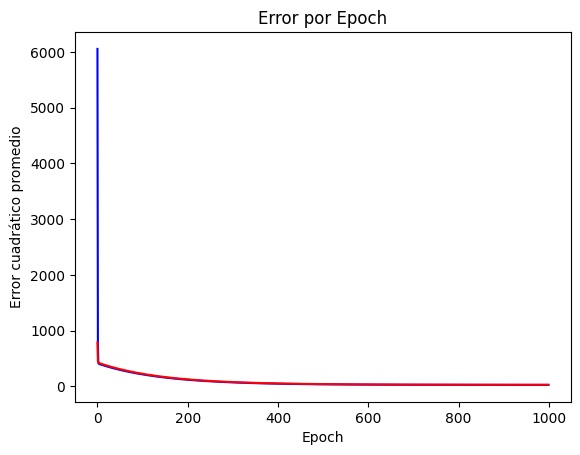

In [11]:
# Visualización del error de entrenamiento por epoch
plt.figure()
plt.plot(range(epochs), train_loss_per_epoch, '-b')
plt.plot(range(epochs), val_loss_per_epoch, '-r')
plt.xlabel('Epoch')
plt.ylabel('Error cuadrático promedio')
plt.title('Error por Epoch')
plt.show()

Costo del modelo: 25.788001865233994


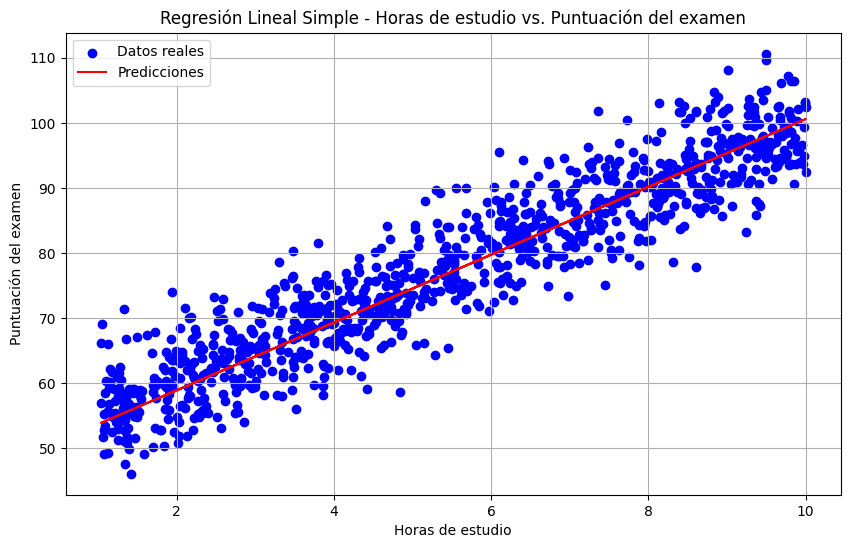

In [12]:
# Realizar predicciones en test
y_pred = w * X_test.flatten() + b

# Calcular el costo
cost = cost_function(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)

MSE en el conjunto de test: 25.788001865233994
MAE en el conjunto de test: 3.9995348122207552
R^2 en el conjunto de test: 0.8706204075939625
MAPE en el conjunto de test: 0.05297490344439926


## Implementación de la regresión lineal usando sklearn

In [14]:
# Crear el modelo de regresión lineal con sklearn
lin_reg = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
lin_reg.fit(X_train, y_train)

LinearRegression()

Costo del modelo con sklearn: 25.24963738333083


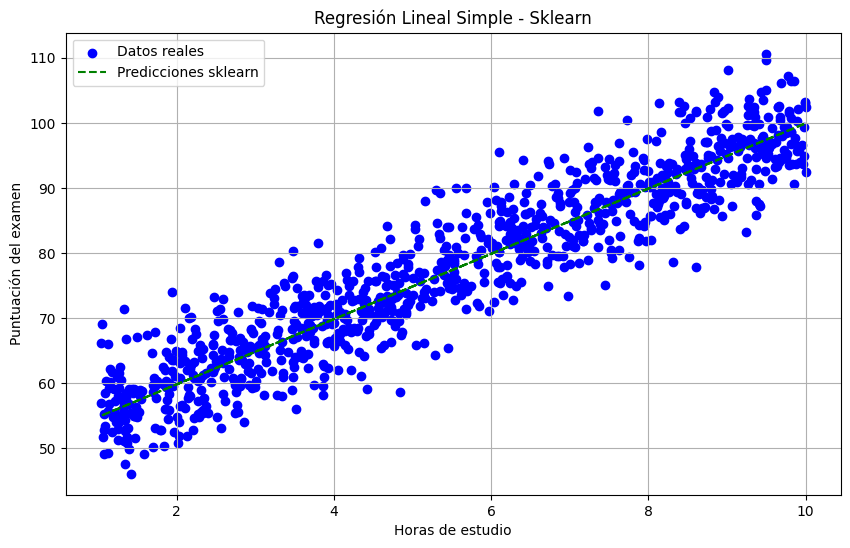

In [15]:
# Realizar predicciones en test
y_pred_sklearn = lin_reg.predict(X_test)

# Calcular el costo
cost_sklearn = cost_function(y_test, y_pred_sklearn)

print("Costo del modelo con sklearn:", cost_sklearn)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred_sklearn, color='green', linestyle='dashed', label='Predicciones sklearn')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Sklearn')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
mae_sklearn = mean_absolute_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)
mape_sklearn = mean_absolute_percentage_error(y_test, y_pred_sklearn)

print("MSE en el conjunto de test (sklearn):", mse_sklearn)
print("MAE en el conjunto de test (sklearn):", mae_sklearn)
print("R^2 en el conjunto de test (sklearn):", r2_sklearn)
print("MAPE en el conjunto de test (sklearn):", mape_sklearn)

MSE en el conjunto de test (sklearn): 25.24963738333083
MAE en el conjunto de test (sklearn): 3.9544897494040634
R^2 en el conjunto de test (sklearn): 0.8733214069811396
MAPE en el conjunto de test (sklearn): 0.05257659436831548


## Comparación de parámetros obtenidos

In [18]:
# Comparación de parámetros obtenidos
b_sklearn = lin_reg.intercept_
w_sklearn = lin_reg.coef_[0]

print("Coeficiente de intercepción (b) - Manual:", b)
print("Coeficiente de pendiente (w) - Manual:", w)
print("Coeficiente de intercepción (b) - Scikit-learn:", b_sklearn)
print("Coeficiente de pendiente (w) - Scikit-learn:", w_sklearn)


Coeficiente de intercepción (b) - Manual: 48.49650269521719
Coeficiente de pendiente (w) - Manual: 5.209114712638834
Coeficiente de intercepción (b) - Scikit-learn: 49.793769346749876
Coeficiente de pendiente (w) - Scikit-learn: 5.014015542462287
